# Fresh & Rotten Fruits Classification

## The Dataset

The dataset comes from [Kaggle](https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification), The dataset structure is in the `data/fruits` folder. There are 6 categories of fruits: fresh apples, fresh oranges, fresh bananas, rotten apples, rotten oranges, and rotten bananas. This will mean that your model will require an output layer of 6 neurons to do the categorization successfully. You'll also need to compile the model with `categorical_crossentropy`, as we have more than two categories.

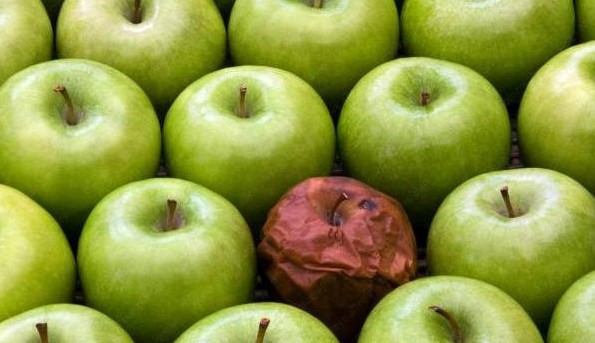

## Load ImageNet Base Model

In [1]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


## Freeze Base Model

In [2]:
# Freeze base model
base_model.trainable = False

## Add Layers to Model

In [4]:
# Create inputs with correct shape
inputs = keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer
outputs = keras.layers.Dense(6, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs, outputs)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 6)                 3078      
Total params: 14,717,766
Trainable params: 3,078
Non-trainable params: 14,714,688
_________________________________________________________________


## Compile Model

In [6]:
model.compile(loss = keras.losses.CategoricalCrossentropy(from_logits=True) , metrics = [keras.metrics.BinaryAccuracy()])

## Augment the Data

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        samplewise_center=True,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1, 
        height_shift_range=0.1,
        horizontal_flip=True,  
        vertical_flip=False)

## Load Dataset

In [8]:
# load and iterate training dataset
train_it = datagen.flow_from_directory('data/fruits/train/', 
                                       target_size=(224, 224), 
                                       color_mode='rgb', 
                                       class_mode="categorical")
# load and iterate validation dataset
valid_it = datagen.flow_from_directory('data/fruits/valid/', 
                                      target_size=(224, 224), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 1182 images belonging to 6 classes.
Found 329 images belonging to 6 classes.


## Train the Model

Time to train the model! Pass the `train` and `valid` iterators into the `fit` function, as well as setting your desired number of epochs.

In [9]:
model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples/train_it.batch_size,
          validation_steps=valid_it.samples/valid_it.batch_size,
          epochs=10)

Epoch 1/10
37/36 [==============================] - 27s 732ms/step - loss: 1.5422 - binary_accuracy: 0.8374 - val_loss: 1.4023 - val_binary_accuracy: 0.8886
Epoch 2/10
37/36 [==============================] - 19s 501ms/step - loss: 1.3563 - binary_accuracy: 0.9007 - val_loss: 1.3317 - val_binary_accuracy: 0.9088
Epoch 3/10
37/36 [==============================] - 18s 498ms/step - loss: 1.2499 - binary_accuracy: 0.9365 - val_loss: 1.1859 - val_binary_accuracy: 0.9574
Epoch 4/10
37/36 [==============================] - 18s 497ms/step - loss: 1.1448 - binary_accuracy: 0.9687 - val_loss: 1.1557 - val_binary_accuracy: 0.9676
Epoch 5/10
37/36 [==============================] - 18s 495ms/step - loss: 1.1160 - binary_accuracy: 0.9807 - val_loss: 1.1344 - val_binary_accuracy: 0.9701
Epoch 6/10
37/36 [==============================] - 18s 496ms/step - loss: 1.1049 - binary_accuracy: 0.9820 - val_loss: 1.1212 - val_binary_accuracy: 0.9792
Epoch 7/10
37/36 [==============================] - 18s 49

## Unfreeze Model for Fine Tuning

In [ ]:
# Unfreeze the base model
base_model.trainable = TRUE

# Compile the model with a low learning rate
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate = 0.001),
              loss = keras.losses.CategoricalCrossentropy(from_logits=True) , metrics = [keras.metrics.BinaryAccuracy()])

In [ ]:
model.fit(train_it,
          validation_data=FIXME,
          steps_per_epoch=train_it.samples/train_it.batch_size,
          validation_steps=valid_it.samples/valid_it.batch_size,
          epochs=5)

## Evaluate the Model

In [10]:
model.evaluate(valid_it, steps=valid_it.samples/valid_it.batch_size)

11/10 [================================] - 4s 357ms/step - loss: 1.0996 - binary_accuracy: 0.9843


[1.0995687246322632, 0.9842957854270935]

*Evaluated Model gave the validation loss of 1.0996 and Validation set accuracy 98.4%*